In [30]:
import pandas as pd

df_review = pd.read_csv("data_traveloka_fix.csv", sep='|', header=None)

In [40]:
df_review.tail()

,0,1
1195,negative,"Wah gila, baru kali ini pesen akomodasi di @tr..."
1196,negative,Cukup deh pake apps @traveloka .Ga mau kan uda...
1197,negative,Nangis bgt itu traveloka grand bazaarnya harga...
1198,negative,@traveloka makin lama makin parah nih layanan ...
1199,negative,Udahla @traveloka basi tau... Tim spesialist a...


In [57]:
df_review[0].value_counts()

positive    689
negative    511
Name: 0, dtype: int64

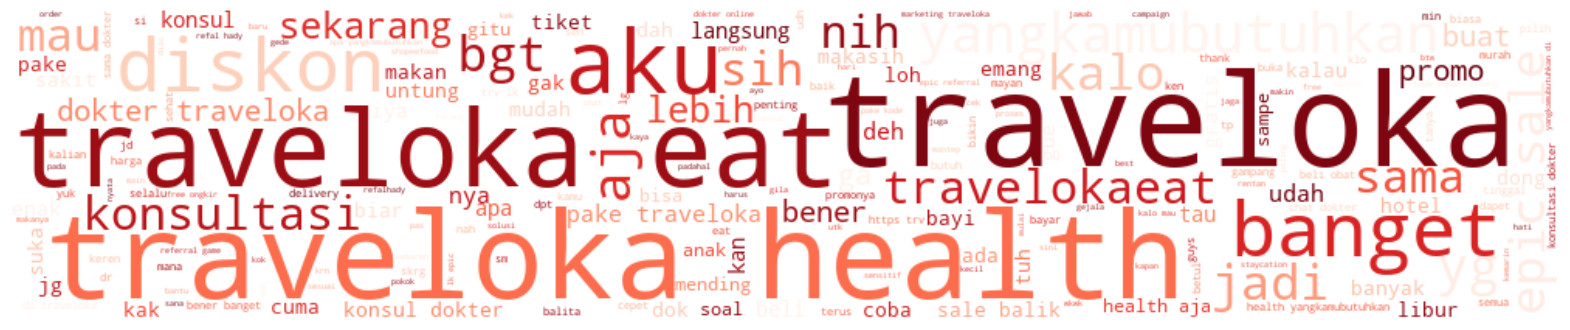

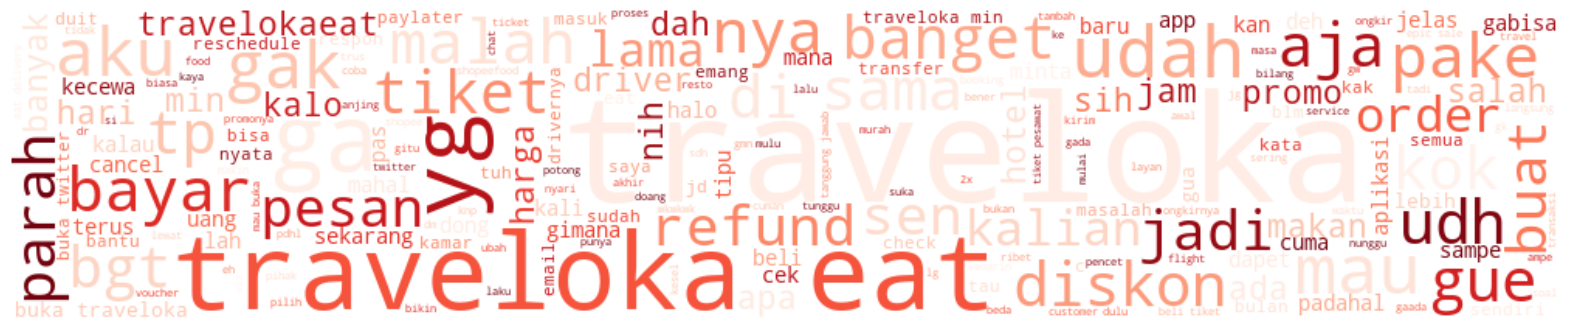

In [114]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

train_s0 = df_review[df_review[0] == 'positive']
all_text_s0 = ' '.join(word for word in train_s0[1])
wordcloud = WordCloud(colormap='Reds', width=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

train_s1 = df_review[df_review[0] == 'negative']
all_text_s1 = ' '.join(word for word in train_s1[1])
wordcloud = WordCloud(colormap='Reds', width=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

In [44]:
wf = wordcloud.words_
# wf

In [45]:
!pip install Sastrawi

                                              0.0/209.7 kB ? eta -:--:--
     -                                        10.2/209.7 kB ? eta -:--:--
     -                                        10.2/209.7 kB ? eta -:--:--
     -----                                 30.7/209.7 kB 435.7 kB/s eta 0:00:01
     -------                               41.0/209.7 kB 279.3 kB/s eta 0:00:01
     ----------                            61.4/209.7 kB 326.1 kB/s eta 0:00:01
     ------------                          71.7/209.7 kB 280.5 kB/s eta 0:00:01
     ------------                          71.7/209.7 kB 280.5 kB/s eta 0:00:01
     ----------------                      92.2/209.7 kB 290.5 kB/s eta 0:00:01
     -------------------                  112.6/209.7 kB 297.7 kB/s eta 0:00:01
     ---------------------                122.9/209.7 kB 288.1 kB/s eta 0:00:01
     ------------------------             143.4/209.7 kB 303.9 kB/s eta 0:00:01
     --------------------------           153.6/209.7 kB 30

In [46]:
import string, re

def cleansing(data):
    # lower text
    data = data.lower()
    
    # hapus punctuation
    remove = string.punctuation
    translator = str.maketrans(remove, ' '*len(remove))
    data = data.translate(translator)
    
    # remove ASCII dan unicode
    data = data.encode('ascii', 'ignore').decode('utf-8')
    data = re.sub(r'^\x00-\x7f]', r'', data)
    
    # remove new line
    data = data.replace('\n', ' ')
    
    return data

In [58]:
# jalankan cleansing data
review = []
# df_review
for index, row in df_review.iterrows():
#     review.append(cleansing(row[df_review[1]]))
      review.append(cleansing(row[1]))
    
df_review[1] = review
df_review.head()

,0,1
0,positive,beli dear butter only 0 rupiah from traveloka...
1,positive,super deals by traveloka and they have a lot ...
2,negative,rip traveloka eats
3,negative,harga shopeefood grabfood gofood dan travel...
4,negative,traveloka eats diskonnya dikit doang sekarang ...


In [59]:
# import library
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

# Contoh
kalimat = 'Dengan menggunakan python dan library sastrawi saya dapat melakukan proses stop word removal'
stop = stopword.remove(kalimat)
print(stop)

Dengan menggunakan python library sastrawi dapat melakukan proses stop word removal


In [60]:
# Lakukan pada data kita

review = []
for index, row in df_review.iterrows():
    review.append(stopword.remove(row[1]))
    
df_review[1] = review
df_review.head()

,0,1
0,positive,beli dear butter only 0 rupiah from traveloka...
1,positive,super deals by traveloka and they have a lot ...
2,negative,rip traveloka eats
3,negative,harga shopeefood grabfood gofood traveloka ...
4,negative,traveloka eats diskonnya dikit doang sekarang ...


In [61]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# contoh
kalimat = 'Liverpool adalah klub hebat tidak seperti si itu WkwkWK'
katadasar = stemmer.stem(kalimat)

print(katadasar)

liverpool adalah klub hebat tidak seperti si itu wkwkwk


In [63]:
# Implementasi pada data kita
review = []
for index, row in df_review.iterrows():
    review.append(stemmer.stem(row[1]))
    
df_review[1] = review
df_review.head()

,0,1
0,positive,beli dear butter only 0 rupiah from travelokae...
1,positive,super deals by traveloka and they have a lot o...
2,negative,rip traveloka eats
3,negative,harga shopeefood grabfood gofood traveloka eat...
4,negative,traveloka eats diskon dikit doang sekarang


In [104]:
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(df_review[1], df_review[0],
#                                                    test_size=0.1, stratify=df_review[0], random_state=30)
X_train, X_test, y_train, y_test = train_test_split(df_review[1].astype(str), df_review[0].astype(str),
                                                   test_size=0.1, stratify=df_review[0], random_state=30)


In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'Pusing satu kali',
    'Pusing dua kali',
    'Pusing tiga kali',
    'Pusing lagi']

vectorizer = TfidfVectorizer()

# contoh
X = vectorizer.fit_transform(corpus)
X.toarray()
# print(X)

array([[0.        , 0.49248889, 0.        , 0.40264194, 0.77157901,
        0.        ],
       [0.77157901, 0.49248889, 0.        , 0.40264194, 0.        ,
        0.        ],
       [0.        , 0.49248889, 0.        , 0.40264194, 0.        ,
        0.77157901],
       [0.        , 0.        , 0.88654763, 0.46263733, 0.        ,
        0.        ]])

In [106]:
# implementasi pada dokumen kita
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(1080, 3344)
(120, 3344)


In [107]:
def preprocess_data(data):
    # cleansing data
    data = cleansing(data)

    # hapus stopwords
    factory = StopWordRemoverFactory()
    stopword = factory.create_stop_word_remover()
    data = stopword.remove(data)

    # stemming
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    data = stemmer.stem(data)

    # count vectorizer
    data = vectorizer.transform([data])

    return data

In [108]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

clf = svm.SVC(kernel="linear")

#cross_val_score(clf, X_train, y_train, cv=10)

In [109]:
# lakukan prediksi pada data set
clf.fit(X_train,y_train)
predict = clf.predict(X_test)

In [110]:
# import library evaluation
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score

In [111]:
# f1_score
print("F1 score hasil prediksi adalah:")
print(f1_score(y_test, predict, pos_label='positive'))

# accuracy score
print("Accuracy score hasil prediksi adalah:")
print(accuracy_score(y_test, predict))

# precision score
print("Precision score hasil prediksi adalah:")
print(precision_score(y_test, predict, pos_label='positive'))

# recall score
print("Recall score hasil prediksi adalah:")
print(recall_score(y_test, predict, pos_label='positive'))

F1 score hasil prediksi adalah:
0.8857142857142857
Accuracy score hasil prediksi adalah:
0.8666666666666667
Precision score hasil prediksi adalah:
0.8732394366197183
Recall score hasil prediksi adalah:
0.8985507246376812
